## Generating an "alien" mode using skin detection

### Skin Detection Algorithm:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = "omer.jpg"
image = cv2.imread(image_path)

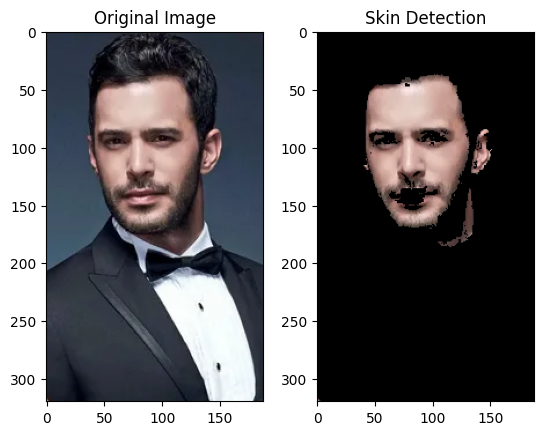

In [3]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_skin = np.array([0, 20, 70], dtype=np.uint8)
upper_skin = np.array([20, 255, 255], dtype=np.uint8)

skin_mask = cv2.inRange(hsv, lower_skin, upper_skin)

result = cv2.bitwise_and(image, image, mask=skin_mask)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Skin Detection")

plt.show()

### Showing the user where to put their face (in image and in camera)

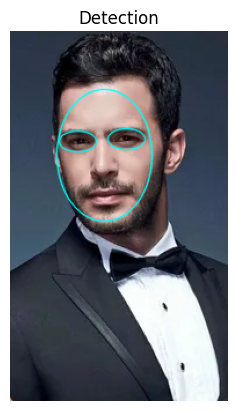

In [4]:

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))


for (x, y, w, h) in faces:
   
    center_face = (x + w // 2, y + h // 2)
    face_h = h // 2
    face_w = int(face_h * 0.72)
    color_face = (255, 255, 0)
    thickness_face = 1

    cv2.ellipse(image, center_face, (face_w, face_h), 0, 0, 360, color_face, thickness_face, cv2.LINE_AA)

    roi_face = image[y:y + h, x:x + w]

    eyes = eye_cascade.detectMultiScale(roi_face)

    for (ex, ey, ew, eh) in eyes:
        center_eye = (x + ex + ew // 2, y + ey + eh // 2)
        color_eye = color_face
        thickness_eye = 1

        eye_major_axis = int(ew * 0.7)
        eye_minor_axis = int(eh * 0.4)
        cv2.ellipse(image, center_eye, (eye_major_axis, eye_minor_axis), 0, 0, 360, color_eye, thickness_eye, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detection")
plt.axis('off')
plt.show()


In [5]:

cap = cv2.VideoCapture(0)

while True:
   
    ret, frame = cap.read()
    if not ret:
        print("Error capturing from camera.")
        break

    height, width, _ = frame.shape

    black_background = np.zeros((height, width, 3), dtype=np.uint8)

    face_center = (width // 2, height // 2)
    face_h = int(height // 2 * 0.72)
    face_w = int(face_h * 0.72)
    eye_radius = int(face_h * 0.15)
    eye_offset = int(eye_radius * 2.2) 

    color_contour = (255, 255, 0) 
    thickness_contour = 2
    cv2.ellipse(black_background, face_center, (face_w, face_h), 0, 0, 360, color_contour, thickness_contour)

  
    eye_height = int(eye_radius * 0.5)
    eye_width = int(eye_radius * 1.5)
    
    left_eye_center = (face_center[0] - eye_offset, face_center[1] - 10) 
    right_eye_center = (face_center[0] + eye_offset, face_center[1] - 10)

    cv2.ellipse(black_background, left_eye_center, (eye_width, eye_height), 0, 0, 360, color_contour, thickness_contour)
    cv2.ellipse(black_background, right_eye_center, (eye_width, eye_height), 0, 0, 360, color_contour, thickness_contour)

    font = cv2.FONT_HERSHEY_SIMPLEX
    text = "Put Your Face"
    font_scale = 1
    font_thickness = 2
    text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
    text_position = ((width - text_size[0]) // 2, height - 20)
    cv2.putText(black_background, text, text_position, font, font_scale, color_contour, font_thickness, cv2.LINE_AA)

    result_frame = cv2.addWeighted(frame, 1, black_background, 0.5, 0)

    cv2.imshow("Face Placement Guide", result_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Error capturing from camera.


###  Skin-color changer (in image and in camera)

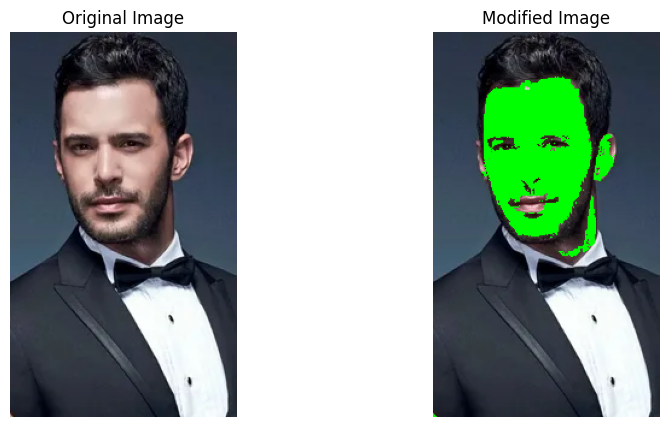

In [6]:
def change_skin_color(image, new_color):
    # Convert BGR to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)

   
    skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

    
    non_skin_mask = cv2.bitwise_not(skin_mask)

    
    image[skin_mask > 0] = new_color

    return image


image_path = "omer.jpg"
original_image = cv2.imread(image_path)


new_skin_color = [0, 255, 0]  


modified_image = change_skin_color(original_image.copy(), new_skin_color)


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
ax[1].set_title('Modified Image')
ax[1].axis('off')

plt.show()


In [7]:

def change_skin_color(image, new_color):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_skin = np.array([0, 20, 70], dtype=np.uint8)
    upper_skin = np.array([20, 255, 255], dtype=np.uint8)
    skin_mask = cv2.inRange(hsv, lower_skin, upper_skin)
    image[skin_mask > 0] = new_color
    return image

def process_camera_feed():
 
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()

        if not ret:
            print("Error capturing from camera.")
            break

        # Resize frame for faster processing (optional)
        frame = cv2.resize(frame, (640, 480))

       
        result = change_skin_color(frame.copy(), [0, 255, 0])

        # Display the result
        cv2.imshow("Camera Feed", result)

        # Break the loop if 'q' key is pressed or the window is closed
        key = cv2.waitKey(1)
        if key == ord('q'): 
            break

    cap.release()
    cv2.destroyAllWindows()

process_camera_feed()


Error capturing from camera.


In [8]:
import cv2
import numpy as np

def open_camera():
    cap = cv2.VideoCapture('http://192.168.100.48:8080/video')
    
    while True:
        ret, frame = cap.read()

        if not ret:
            print("Error capturing from camera.")
            break

   
        processed_frame = process_frame(frame)

        
        cv2.imshow("Processed Frame", processed_frame)

        # Прерывание цикла при нажатии клавиши 'q'
        key = cv2.waitKey(1)
        if key == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

def process_frame(frame):
   
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    return gray_frame

open_camera()


Error capturing from camera.
